In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
import os

In [3]:
import cv2

In [4]:
CATEGORIES = ["Cat","Dog"]
DATADIR = "PetImages"
IMG_SIZE = 70
training_data = []

In [9]:
def prepare_training_dataset(DATADIR,CATEGORIES):
    for categories in CATEGORIES:
        path = os.path.join(DATADIR,categories)
        class_num = CATEGORIES.index(categories)
        for files in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path,files),cv2.IMREAD_GRAYSCALE)
                new_img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_img,class_num])
            except Exception as e:
                pass

In [10]:
prepare_training_dataset(DATADIR,CATEGORIES)

In [11]:
import random

random.shuffle(training_data)

In [12]:
len(training_data)

24946

In [13]:
X = []
y = []
for features,labels in training_data:
    X.append(features)
    y.append(labels)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [14]:
X = X / 255.0

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
history = model.fit(X,y,epochs=5,validation_split=0.2)

Train on 19956 samples, validate on 4990 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
19956/19956 [==============================] - 154s 8ms/sample - loss: 7.9349 - acc: 0.5021 - val_loss: 8.1245 - val_acc: 0.4904
Epoch 2/5
19956/19956 [==============================] - 156s 8ms/sample - loss: 7.9352 - acc: 0.5023 - val_loss: 8.1245 - val_acc: 0.4904
Epoch 3/5
19956/19956 [==============================] - 171s 9ms/sample - loss: 7.9352 - acc: 0.5023 - val_loss: 8.1245 - val_acc: 0.4904
Epoch 4/5
19956/19956 [==============================] - 178s 9ms/sample - loss: 7.9352 - acc: 0.5023 - val_loss: 8.1245 - val_acc: 0.4904
Epoch 5/5
19956/19956 [==============================] - 195s 10ms/sample - loss: 7.9352 - acc: 0.5023 - val_loss: 8.1245 - val_acc: 0.4904


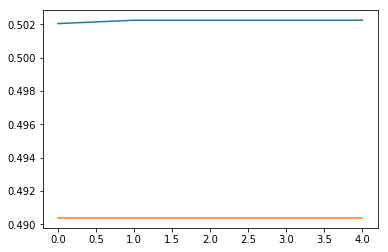

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])